In [1]:
import pandas as pd

# Load the dataset
df = pd.read_excel("..//datasets//modified_location_4.xlsx")

# Print data types of all columns
print(df.dtypes)

Date                     datetime64[ns]
Day                              object
Year                              int64
Month                             int64
Location                         object
Rainfall (in mm)                float64
Latitude                        float64
Longitude                       float64
Quarter                           int64
Cumulative_Rainfall             float64
Previous_Day_Rainfall           float64
Weekly Sum                      float64
Weekly_Average                  float64
hasRainfall                      object
Landslide_possibility            object
Season                           object
dtype: object


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load the dataset
df = pd.read_excel("..//datasets//modified_location_4.xlsx")

# Convert categorical target variable ('hasRainfall') into numerical format
df['hasRainfall'] = df['hasRainfall'].map({'yes': 1, 'no': 0})

# Define features (X) and target (y)
X = df[['Year', 'Month', 'Latitude', 'Longitude', 'Quarter', 
        'Cumulative_Rainfall', 'Previous_Day_Rainfall', 'Weekly_Average']]
y = df['hasRainfall']

# Train-test split (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predictions
y_pred = rf.predict(X_test)

# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")

Model Accuracy: 0.9059


In [3]:
from sklearn.metrics import classification_report

# Generate classification report
report = classification_report(y_test, y_pred)

# Print the full classification report
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.86      0.89      8328
           1       0.89      0.94      0.92     10152

    accuracy                           0.91     18480
   macro avg       0.91      0.90      0.90     18480
weighted avg       0.91      0.91      0.91     18480



In [4]:
# Random Forest Regressor

In [5]:
df0 = pd.read_excel("..//datasets//modified_location_4.xlsx")

In [6]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Select features (excluding non-numeric and target columns)
X = df0.drop(columns=['Rainfall (in mm)', 'hasRainfall', 'Landslide_possibility', 'Season', 'Date', 'Day', 'Location'])
y = df0['Rainfall (in mm)']

# Train-test split (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [7]:
# Initialize the model
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [8]:
# Predict on test data
y_pred = rf_regressor.predict(X_test)

# Print evaluation metrics
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

Mean Absolute Error: 3.6110709356186144
Mean Squared Error: 69.36743485183261
R² Score: 0.6428703647310591


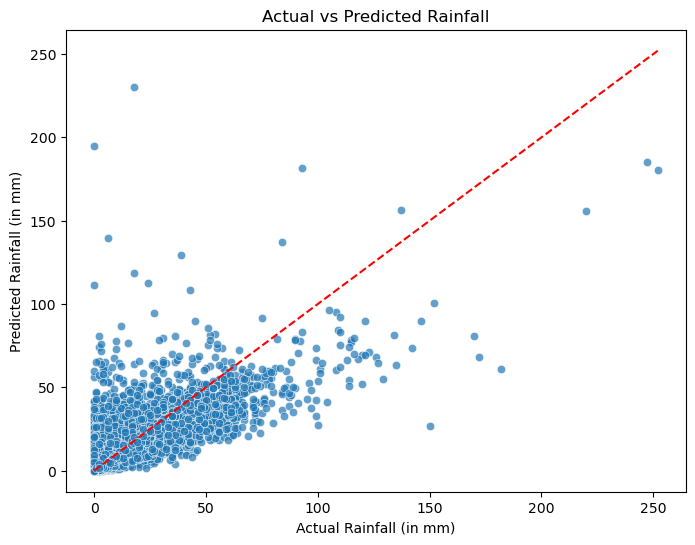

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r', linestyle="--")  # 45-degree line
plt.xlabel("Actual Rainfall (in mm)")
plt.ylabel("Predicted Rainfall (in mm)")
plt.title("Actual vs Predicted Rainfall")
plt.show()

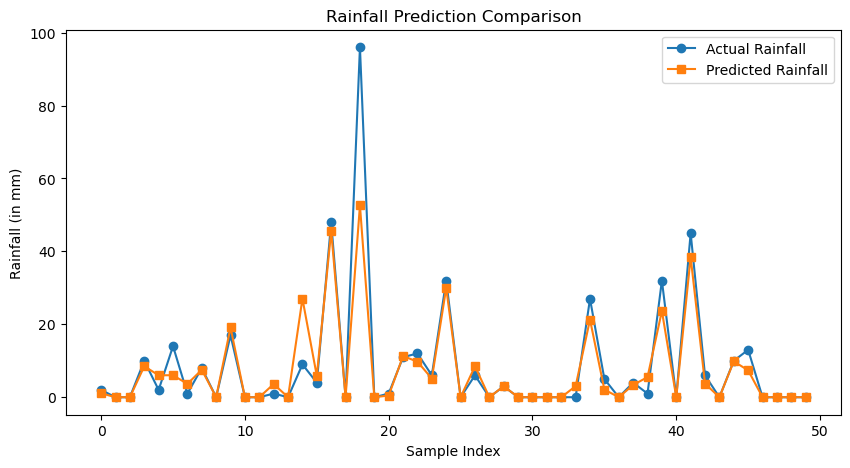

In [10]:
plt.figure(figsize=(10, 5))
plt.plot(y_test.values[:50], label="Actual Rainfall", marker="o")
plt.plot(y_pred[:50], label="Predicted Rainfall", marker="s")
plt.xlabel("Sample Index")
plt.ylabel("Rainfall (in mm)")
plt.title("Rainfall Prediction Comparison")
plt.legend()
plt.show()

In [11]:
# Gradient Boost Regressor

In [12]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
gbr.fit(X_train, y_train)
y_pred_gbr = gbr.predict(X_test)

# Evaluate
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print("GBR R² Score:", r2_score(y_test, y_pred_gbr))
print("GBR MAE:", mean_absolute_error(y_test, y_pred_gbr))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_gbr))

GBR R² Score: 0.6505680360042458
GBR MAE: 3.654641334755313
Mean Squared Error: 67.87226990941194


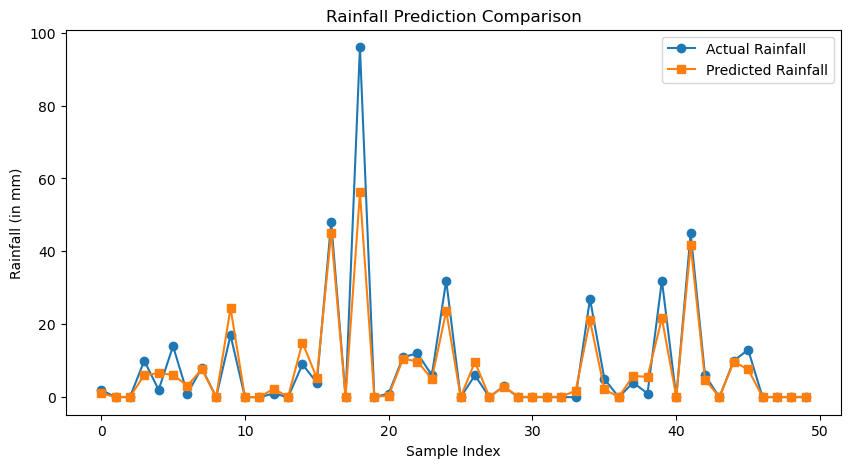

In [13]:
plt.figure(figsize=(10, 5))
plt.plot(y_test.values[:50], label="Actual Rainfall", marker="o")
plt.plot(y_pred_gbr[:50], label="Predicted Rainfall", marker="s")
plt.xlabel("Sample Index")
plt.ylabel("Rainfall (in mm)")
plt.title("Rainfall Prediction Comparison")
plt.legend()
plt.show()

In [14]:
# XG Boost Regressor

In [15]:
# !pip install xgboost

In [16]:
from xgboost import XGBRegressor

xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

print("XGBoost R² Score:", r2_score(y_test, y_pred_xgb))
print("GBR MAE:", mean_absolute_error(y_test, y_pred_xgb))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_xgb))

XGBoost R² Score: 0.6666014289247393
GBR MAE: 3.621835812082578
Mean Squared Error: 64.75800766671506


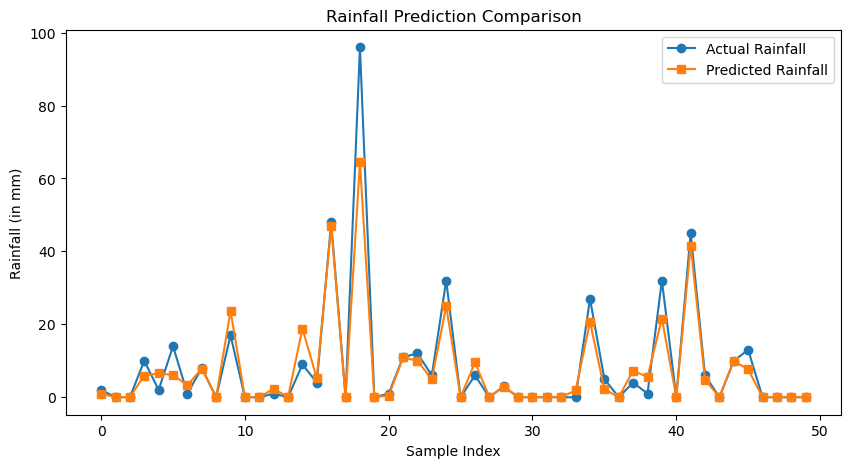

In [17]:
plt.figure(figsize=(10, 5))
plt.plot(y_test.values[:50], label="Actual Rainfall", marker="o")
plt.plot(y_pred_xgb[:50], label="Predicted Rainfall", marker="s")
plt.xlabel("Sample Index")
plt.ylabel("Rainfall (in mm)")
plt.title("Rainfall Prediction Comparison")
plt.legend()
plt.show()